# Complexity Measures

This notebooks runs complexity metrics on time series signals. 

This notebook includes:
- Hjorth parameters
- Lempel-Ziv complexity
- Lyapunov exponent

Note that while entropy measures can be considered as measures of complexity, they are considered in a separate notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import lziv_complexity

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims, run_sims_load
#from apm.run import run_sims_parallel as run_sims
from apm.methods import hjorth_activity, hjorth_mobility, hjorth_complexity, lempelziv, lyapunov
from apm.methods.settings import HJM_PARAMS, HJC_PARAMS, LZ_PARAMS, LY_PARAMS
from apm.plts.base import plot_lines
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.sim.settings import (N_SIMS, EXP, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


## Settings

In [3]:
# Set the random seed
set_random_seed(111)

In [4]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '17_complexity'

In [5]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Hjorth Parameters 

Hjorth parameters are statistical properties that can be used to characterize EEG data.

The Hjorth measures are:
- activity: represents the signal power, computed as the variance of the time series
- mobility: represents the mean frequency of the power spectrum
- complexity: represents the change in frequency

In [6]:
# Check Hjorth measure parameters
print(HJM_PARAMS)
print(HJC_PARAMS)

{}
{}


### Compute Hjorth Parameters on Examples Signals

Note that the simulated signals are normalized to a variance of one, which is why the Hjorth activity is the same for all.

#### Powerlaw Signal

In [7]:
# Check the calculated Hjorth activity values across some example signals
print('Computed Hjorth activity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_activity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_activity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_activity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_activity(SIG_KN)))

Computed Hjorth activity:
  powerlaw: 	 1.0000
  osc:      	 1.0000
  combined: 	 1.0000
  knee:     	 1.0000


In [8]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth mobility:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_mobility(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_mobility(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_mobility(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_mobility(SIG_KN)))

Computed Hjorth mobility:
  powerlaw: 	 0.1412
  osc:      	 0.1256
  combined: 	 0.3097
  knee:     	 0.6069


In [9]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth complexity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_complexity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_complexity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_complexity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_complexity(SIG_KN)))

Computed Hjorth complexity:
  powerlaw: 	 10.3777
  osc:      	 1.0001
  combined: 	 4.6718
  knee:     	 2.4346


### Hjorth Parameters: Aperiodic Variations

In [10]:
# Run simulations calculating Hjorth measures across exponents
hjm_sims_exp, hjm_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_mobility, HJM_PARAMS, 'update_exp', EXPS, N_SIMS)
hjc_sims_exp, hjc_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_complexity, HJC_PARAMS, 'update_exp', EXPS, N_SIMS)

In [11]:
# Run simulations calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb, hjm_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, HJM_PARAMS, 'update_comb_exp', EXPS, N_SIMS)
hjc_sims_comb, hjc_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, HJC_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


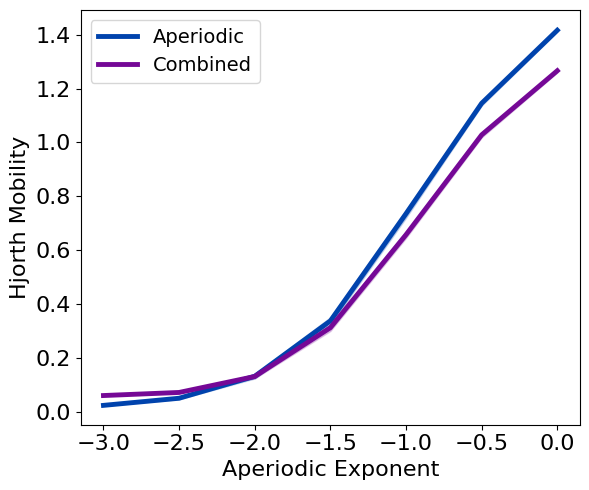

In [12]:
# Plot Hjorth mobility estimates across aperiodic variations
plot_ap_sims(hjm_sims_exp, hjm_sims_exp_var, hjm_sims_comb, hjm_sims_comb_var,
             'Hjorth Mobility', save_fig=SAVE_FIG, file_name='hjm_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


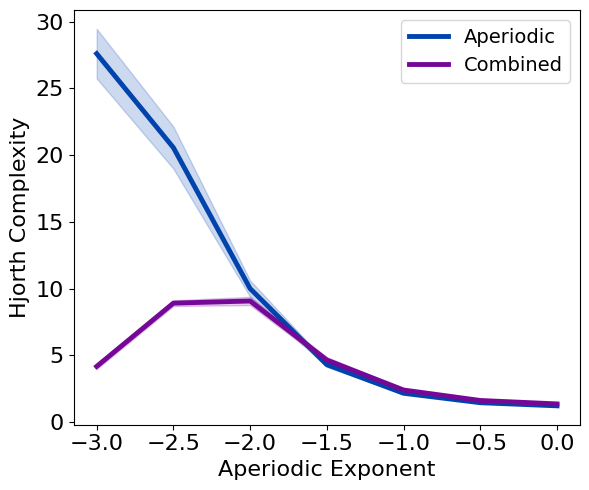

In [13]:
# Plot Hjorth complexity estimates across aperiodic variations
plot_ap_sims(hjc_sims_exp, hjc_sims_exp_var, hjc_sims_comb, hjc_sims_comb_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_ap' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Periodic Variations

In [14]:
# Run simulations calculating Hjorth estimates across oscillation frequency
hjm_sims_freq, hjm_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, HJM_PARAMS, 'update_freq', FREQS, N_SIMS)
hjc_sims_freq, hjc_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, HJC_PARAMS, 'update_freq', FREQS, N_SIMS)

In [15]:
# Run simulations calculating Hjorth estimates across oscillation power
hjm_sims_pow, hjm_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, HJM_PARAMS, 'update_pow', POWERS, N_SIMS)
hjc_sims_pow, hjc_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, HJC_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


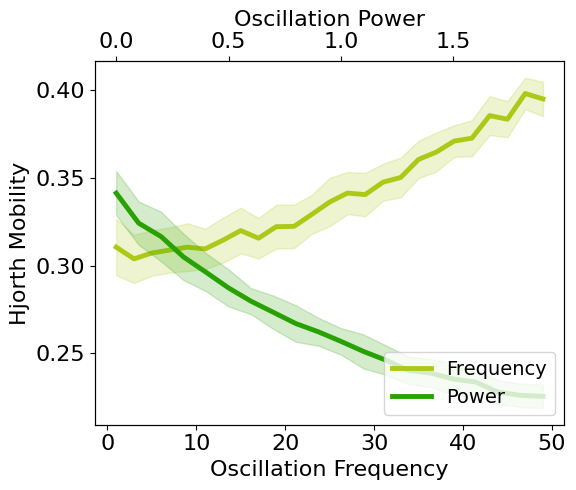

In [16]:
# Plot Hjorth mobility estimates across periodic variations
plot_pe_sims(hjm_sims_freq, hjm_sims_freq_var, hjm_sims_pow, hjm_sims_pow_var,
             'Hjorth Mobility', save_fig=SAVE_FIG, file_name='hjm_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


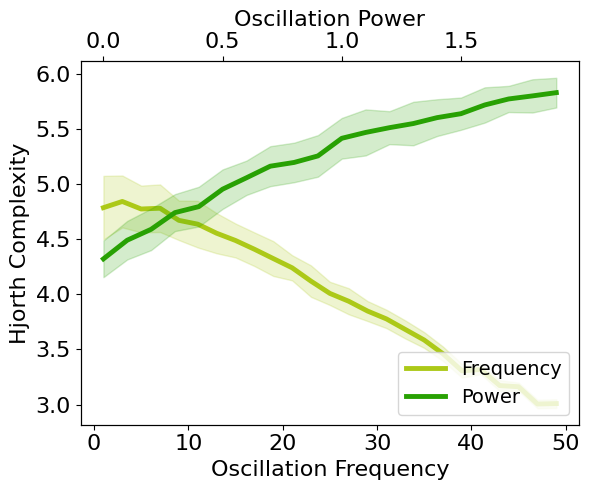

In [17]:
# Plot Hjorth complexity estimates across periodic variations
plot_pe_sims(hjc_sims_freq, hjc_sims_freq_var, hjc_sims_pow, hjc_sims_pow_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_pe' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Knee Variations

In [18]:
# Run simulations calculating Hjorth measures across different timescales
hjm_sims_knee, hjm_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, hjorth_mobility, HJM_PARAMS, 'update_knee', KNEES, N_SIMS)
hjc_sims_knee, hjc_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, hjorth_complexity, HJC_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


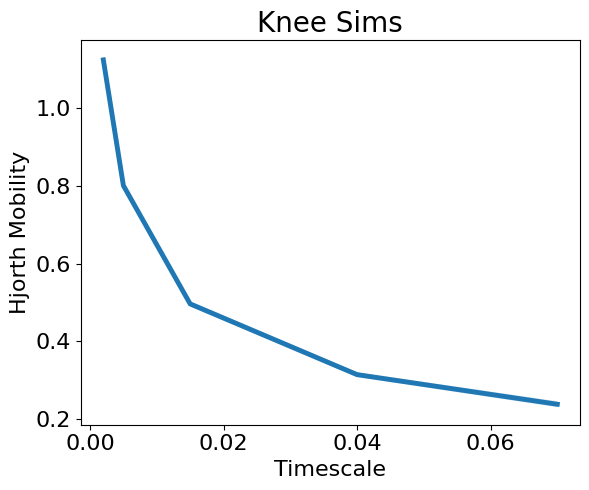

In [19]:
# Plot the estimated Hjorth Mobility across different timescales
plot_lines(KNEES, hjm_sims_knee, hjm_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Hjorth Mobility')
plot_lines(save_fig=SAVE_FIG, file_name='hjm_knee' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


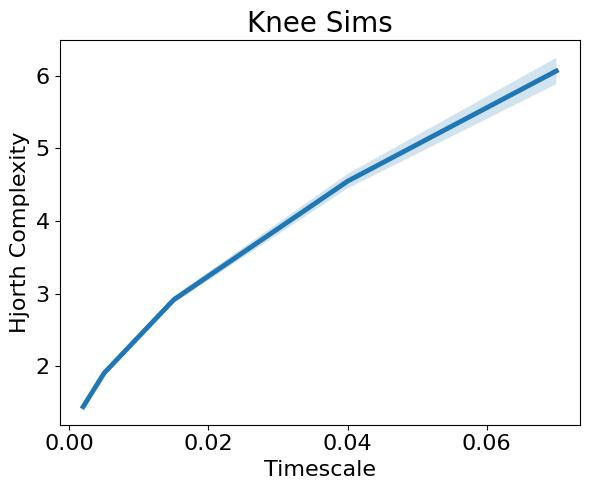

In [20]:
# Plot the estimated Hjorth Complexity across different timescales
plot_lines(KNEES, hjc_sims_knee, hjc_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Hjorth Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='hjc_knee' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Peak Variations

In [21]:
# Run simulations calculating Hjorth measures across peak bandwidth (sims from file)
hjm_sims_bw, hjm_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', hjorth_mobility, HJM_PARAMS)
hjc_sims_bw, hjc_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', hjorth_complexity, HJC_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


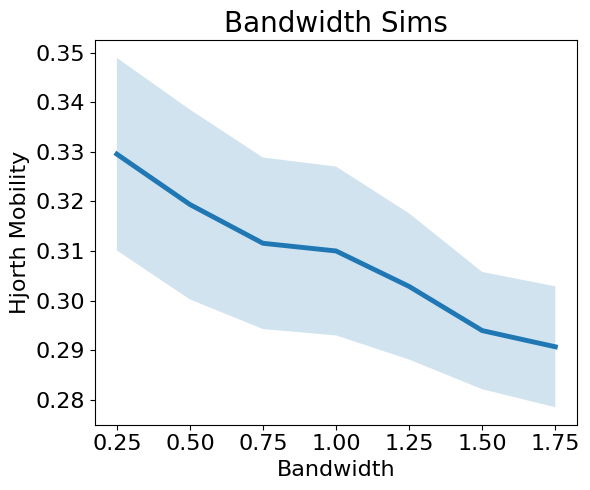

In [22]:
# Plot the estimated Hjorth Mobility across different timescales (estimated with a knee)
plot_lines(BWS, hjm_sims_bw, hjm_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Hjorth Mobility')
plot_lines(save_fig=SAVE_FIG, file_name='hjm_bw' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


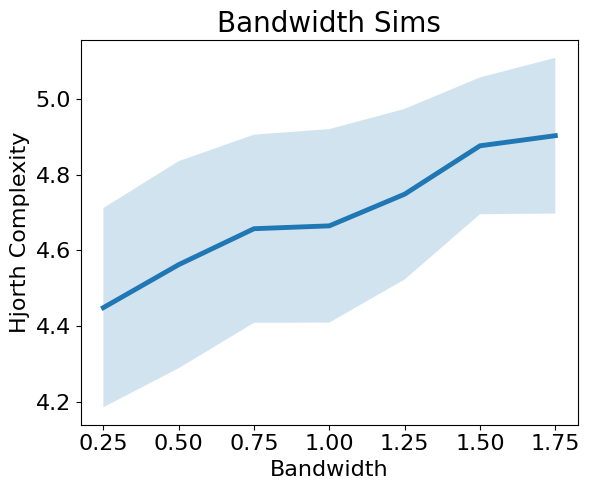

In [23]:
# Plot the estimated Hjort Complexity across different timescales (estimated with a knee)
plot_lines(BWS, hjc_sims_bw, hjc_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Hjorth Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='hjc_bw' + EXT, file_path=FIGPATH)

## Lempel-Ziv Complexity

Lempel-Ziv (LZ) complexity is a measure of the complexity of a time series that is sometimes applied to EEG data. 

Note that the LZ algorithm is defined for binary sequences. 

To apply this measure to neural time series, we binarize the signal by calculating whether each point is above or below the median of the time series.

In [24]:
# Check Lempel-Ziv complexity parameters
LZ_PARAMS

{'normalize': False}

In [25]:
# Example of applying LZ complexity to a binarized signal
bin_sig = np.array(SIG_AP > np.median(SIG_AP)).astype(int)
lziv_complexity(bin_sig)

196

### Calculating Lempel-Ziv Complexity on Example Signals

In [26]:
# Check Lempel-Ziv complexity measures on example signals
print('Lempel-Ziv complexity:')
print('  powerlaw: \t {:5d}'.format(lempelziv(SIG_AP, **LZ_PARAMS)))
print('  osc:      \t {:5d}'.format(lempelziv(SIG_OSC, **LZ_PARAMS)))
print('  combined: \t {:5d}'.format(lempelziv(SIG_COMB, **LZ_PARAMS)))
print('  knee:     \t {:5d}'.format(lempelziv(SIG_KN, **LZ_PARAMS)))

Lempel-Ziv complexity:
  powerlaw: 	   196
  osc:      	     5
  combined: 	   436
  knee:     	   770


### Aperiodic Variations

In [27]:
# Run simulations calculating LZ complexity across exponents
lz_sims_exp, lz_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, lempelziv, LZ_PARAMS, 'update_exp', EXPS, N_SIMS)

In [28]:
# Run simulations calculating LZ complexity across exponents with an oscillation
lz_sims_comb, lz_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


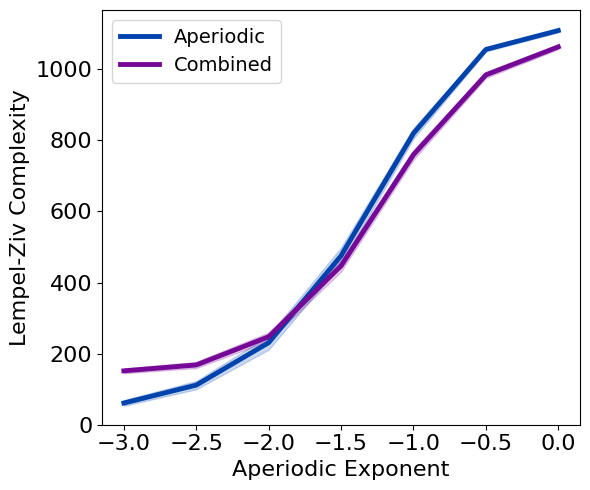

In [29]:
# Plot Lempel-Ziv complexity estimates across aperiodic variations
plot_ap_sims(lz_sims_exp, lz_sims_exp_var, lz_sims_comb, lz_sims_comb_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [30]:
# Run simulations calculating LZ complexity across oscillation frequency
lz_sims_freq, lz_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS, 'update_freq', FREQS, N_SIMS)

In [31]:
# Run simulations calculating LZ complexity dimension across oscillation power
lz_sims_pow, lz_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


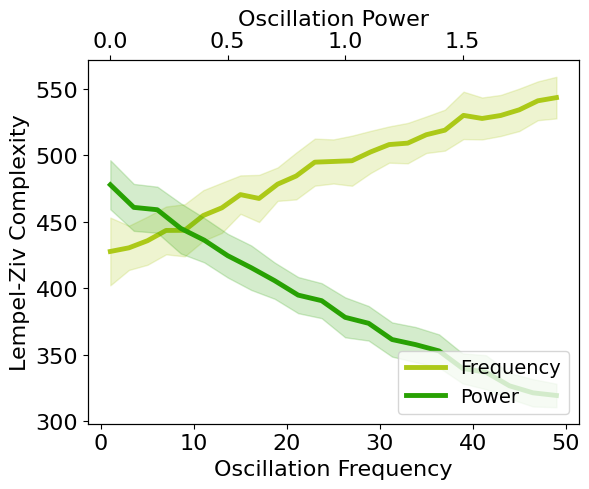

In [32]:
# Plot Lempel-Ziv complexity estimates across periodic variations
plot_pe_sims(lz_sims_freq, lz_sims_freq_var, lz_sims_pow, lz_sims_pow_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_pe' + EXT, file_path=FIGPATH)

### Knee Variations

In [33]:
# Run simulations calculating LZ Complexity across different timescales
lz_sims_knee, lz_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, lempelziv, LZ_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


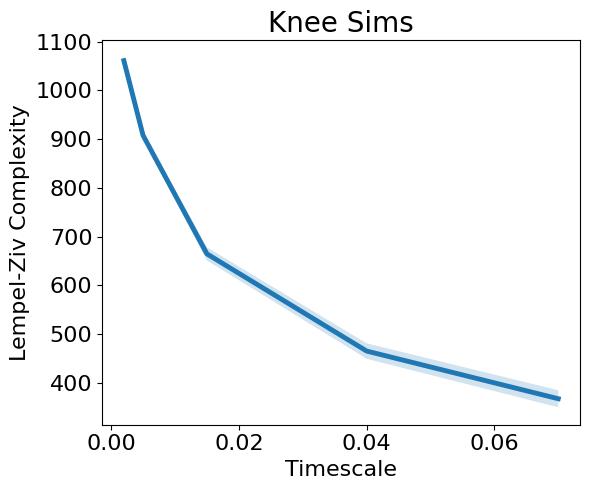

In [34]:
# Plot the estimated LZ Complexity across different timescales (estimated without a knee)
plot_lines(KNEES, lz_sims_knee, lz_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Lempel-Ziv Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='lz_knee' + EXT, file_path=FIGPATH)

### Bandwidth Variations

In [35]:
# Run simulations calculating LZ Complexity across peak bandwidth (sims from file)
lz_sims_bw, lz_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', lempelziv, LZ_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


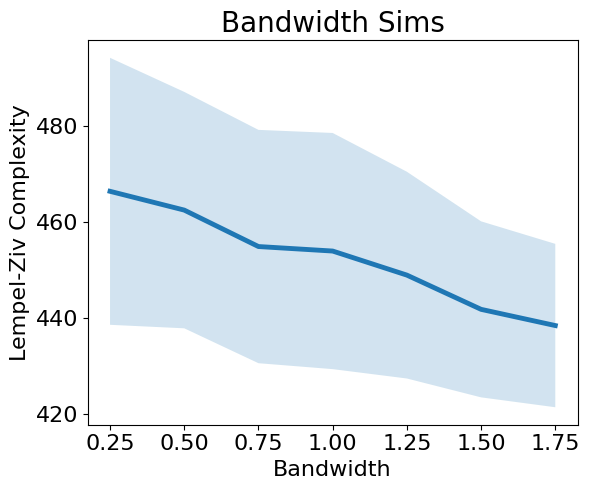

In [36]:
# Plot the estimated LZ Complexity across peak bandwidth
plot_lines(BWS, lz_sims_bw, lz_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Lempel-Ziv Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='lz_bw' + EXT, file_path=FIGPATH)

## Lyapunov Exponent

In [37]:
# Check the calculated Lyapuniv exponent values across some example signals
print('Computed Lyapunov exponent:')
print('  powerlaw: \t {:1.4f}'.format(lyapunov(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(lyapunov(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(lyapunov(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(lyapunov(SIG_KN)))

Computed Lyapunov exponent:
  powerlaw: 	 0.0995
  osc:      	 -0.0000
  combined: 	 0.1146
  knee:     	 0.0910


In [38]:
# Since is an expensive computation, reset to run fewer number of sims
N_SIMS = 10

### Aperiodic Variations

In [39]:
# Run simulations calculating Lyapunov exponent across exponents
ly_sims_exp, ly_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, lyapunov, LY_PARAMS, 'update_exp', EXPS, N_SIMS)

In [40]:
# Run simulations calculating Lyapunov exponent across exponents with an oscillation
ly_sims_comb, ly_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


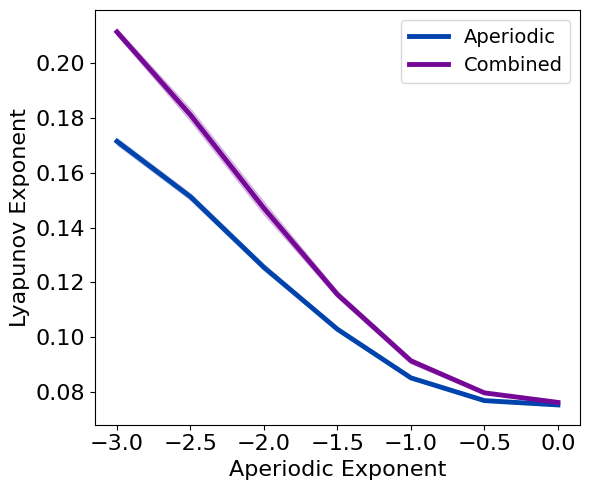

In [41]:
# Plot Lyapunov exponent estimates across aperiodic variations
plot_ap_sims(ly_sims_exp, ly_sims_exp_var, ly_sims_comb, ly_sims_comb_var,
             'Lyapunov Exponent', save_fig=SAVE_FIG, file_name='ly_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [42]:
# Run simulations calculating Lyapunov exponent across oscillation frequency
ly_sims_freq, ly_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS, 'update_freq', FREQS, N_SIMS)

In [43]:
# Run simulations calculating Lyapunov exponent across oscillation power
ly_sims_pow, ly_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


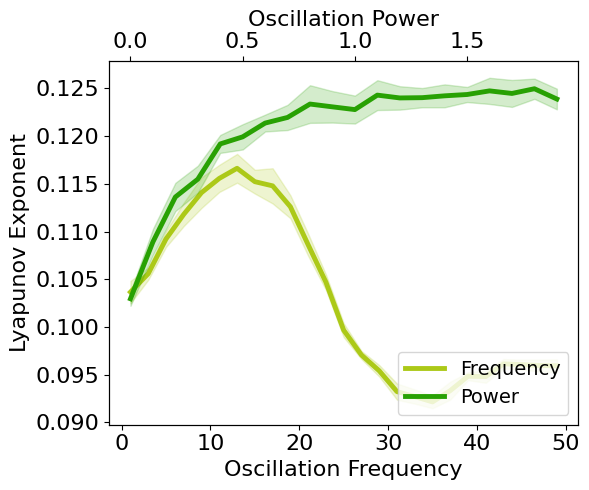

In [44]:
# Plot Lyapunov exponent estimates across periodic variations
plot_pe_sims(ly_sims_freq, ly_sims_freq_var, ly_sims_pow, ly_sims_pow_var,
             'Lyapunov Exponent', save_fig=SAVE_FIG, file_name='ly_pe' + EXT, file_path=FIGPATH)

### Knee Variations

In [45]:
# Run simulations calculating Lyapunov exponent across different timescales
ly_sims_knee, ly_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, lyapunov, LY_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


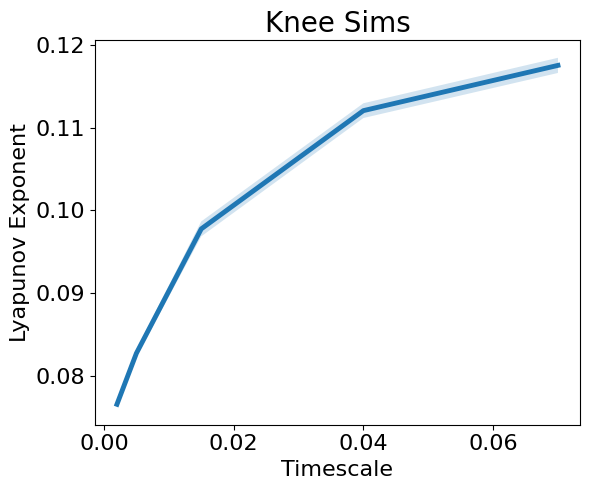

In [46]:
# Plot the estimated Lyapunov exponent across different timescales (estimated without a knee)
plot_lines(KNEES, ly_sims_knee, ly_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Lyapunov Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='ly_knee' + EXT, file_path=FIGPATH)

### Peak Variations

In [47]:
# Run simulations calculating Lyapunov exponent across peak bandwidth (sims from file)
ly_sims_bw, ly_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', lyapunov, LY_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


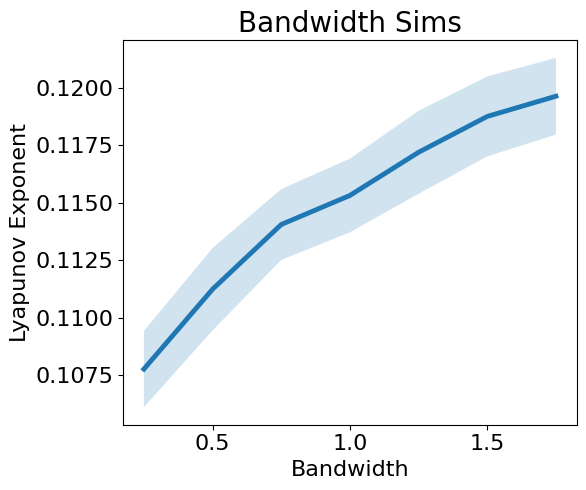

In [48]:
# Plot the estimated Lyapunov exponent across peak bandwidth
plot_lines(BWS, ly_sims_bw, ly_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Lyapunov Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='ly_bw' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Hjorth Parameters:
- mobility increases with decreasing aperiodic exponent (non-linearly) & increases with oscillation frequency & power
- complexity decreases with decreasing aperiodic exponent (non-linearly) & decreases with oscillation frequency & power

Lempel-Ziv Complexity:
- increases with decreasing aperiodic exponent, non-linearly
- increases with increasing oscillation frequency, approximately linearly
- decreases with increasing oscillation power, approximately linearly

Lyapunov Exponent:
- decreases with decreasing aperiodic exponent, non-linearly
- increases to a point, then decreases, with increases oscillation frequency, non-linearly
- increases with increasing oscillation power, non-linearly